In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

In [4]:
# df = pd.read_csv('G:\EDA1-master\Total Data.csv')
df = pd.read_csv('Total Data.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predict
0,28,1,2,130,132,0,2,185,0,0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0,?,?,?,0


In [6]:
new_df = df.replace('?',np.nan)

In [7]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predict
0,28,1,2,130,132,0,2,185,0,0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0,NaN,NaN,NaN,0


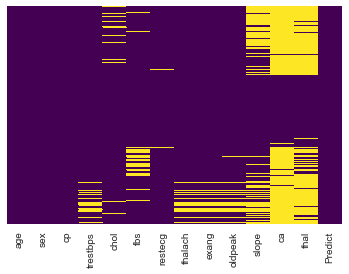

In [62]:
sns.heatmap(new_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

--------------------------------------------------
Missing values by columns :

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
Predict       0
dtype: int64
--------------------------------------------------


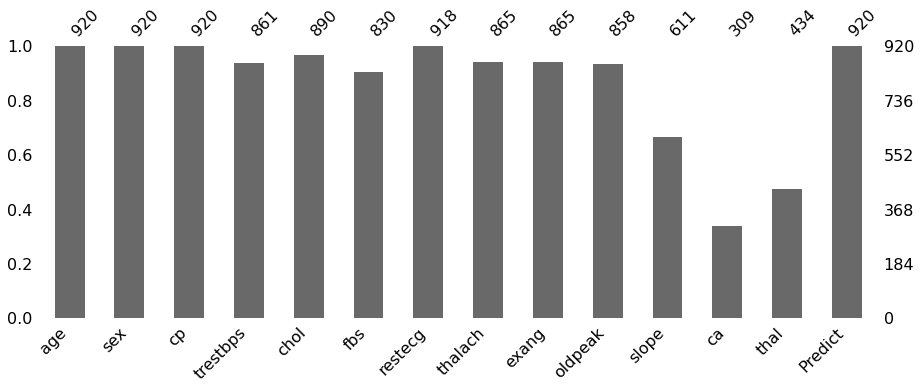

In [12]:
# Visualize the number of missing values as a bar chart 
msno.bar(new_df, figsize=(15, 5))

missing_values = new_df.isna().sum()
print('-' * 50)
print('Missing values by columns :\n')
print(missing_values)
print('-' * 50)

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
mean_imputer = SimpleImputer(strategy='mean')
new_df.iloc[:,:] = mean_imputer.fit_transform(new_df) 

In [15]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predict
0,28.0,1.0,2.0,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,1.770867,0.676375,5.087558,0.0
1,29.0,1.0,2.0,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.770867,0.676375,5.087558,0.0
2,29.0,1.0,2.0,140.0,199.130337,0.0,0.0,170.0,0.0,0.0,1.770867,0.676375,5.087558,0.0
3,30.0,0.0,1.0,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.770867,0.676375,6.000000,0.0
4,31.0,0.0,2.0,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.770867,0.676375,5.087558,0.0


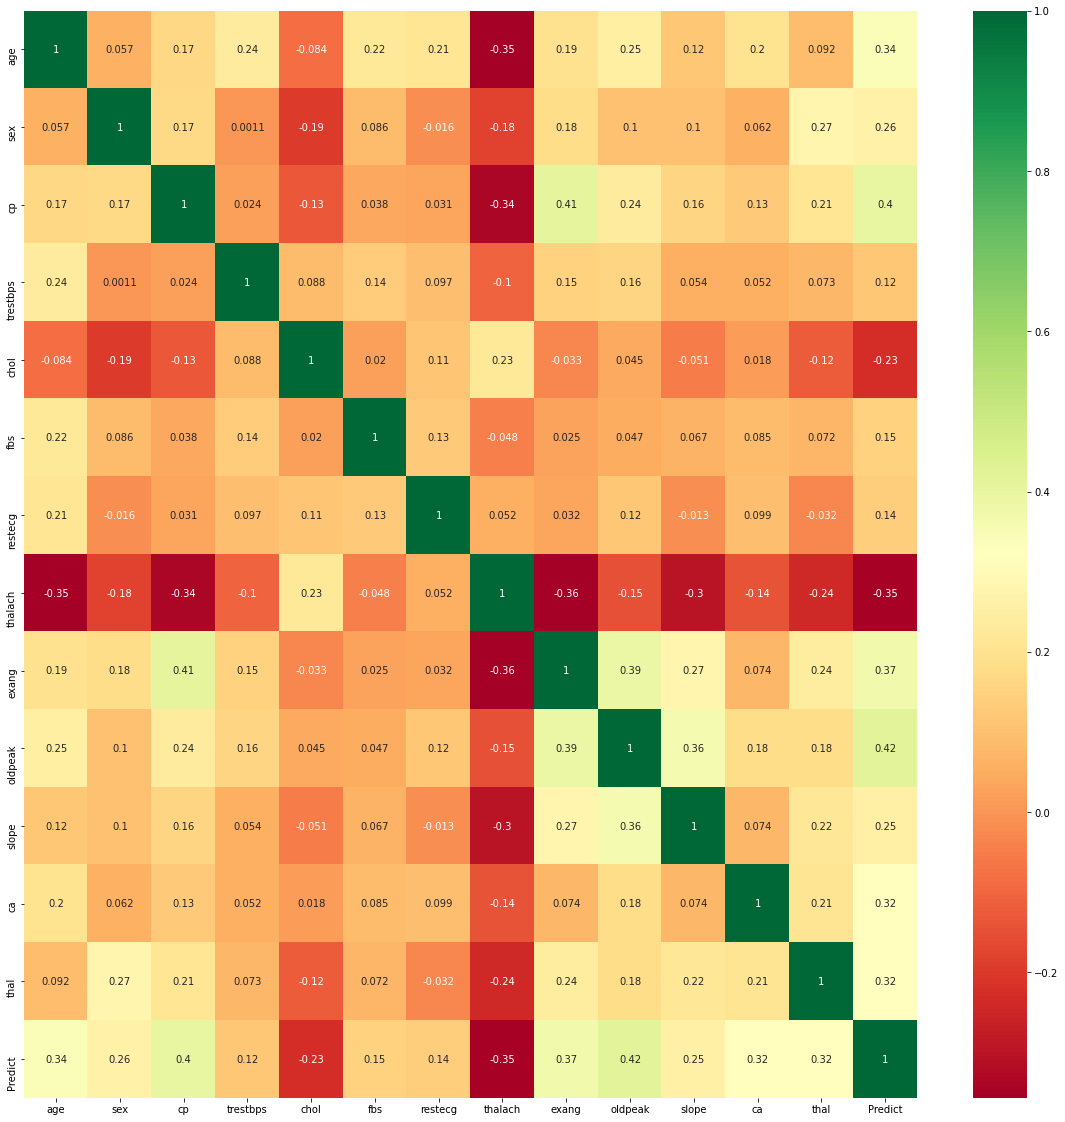

In [16]:
import seaborn as sns
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(new_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

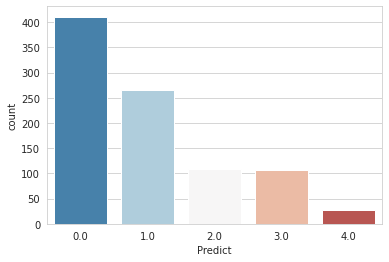

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Predict',data=new_df,palette='RdBu_r')

In [18]:
new_df = pd.get_dummies(new_df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
new_df[columns_to_scale] = standardScaler.fit_transform(new_df[columns_to_scale])

In [20]:
new_df.head()

,age,trestbps,chol,thalach,oldpeak,Predict,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_3.0,ca_0.0,ca_0.6763754045307443,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_5.087557603686636,thal_6.0,thal_7.0
0,-2.708286,-0.115679,-6.164492e-01,1.888743,-0.834397,0.0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,-2.602124,-0.658158,4.028495e-01,0.893711,-0.834397,0.0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,-2.602124,0.426801,-2.609929e-16,1.291724,-0.834397,0.0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,-2.495962,2.054240,3.477522e-01,1.291724,-0.834397,0.0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,-2.389800,-1.743118,1.824606e-01,0.495698,-0.834397,0.0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [21]:
y = new_df['Predict']
X = new_df.drop(['Predict'], axis = 1)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,51):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=15)
    knn_scores.append(score.mean())

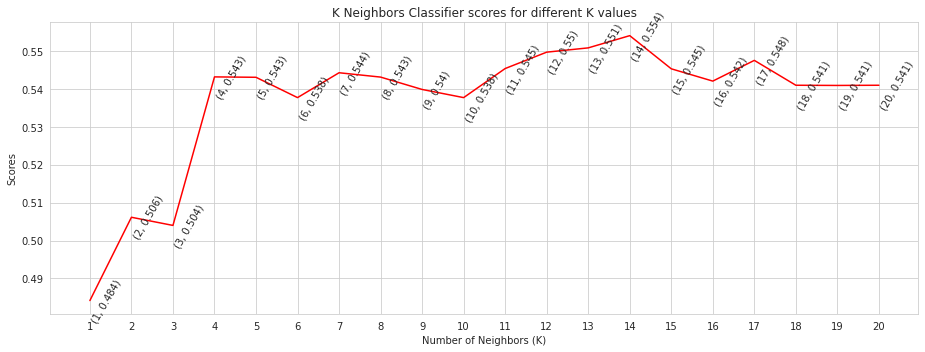

In [72]:
plt.figure(figsize=(13, 5))
plt.plot([k for k in range(1, 21)], knn_scores[: 20], color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1], 3)), rotation=60, verticalalignment='center')
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.tight_layout()

In [96]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [97]:
score.mean()

0.5336956521739131

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [100]:
score.mean()

0.5195652173913043

In [75]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [76]:
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Test Score: %s' % result.score(X_test, y_test))

Best Score: 0.6057971014492753
Best Hyperparameters: {'C': 0.00010648568665651115, 'penalty': 'none', 'solver': 'lbfgs'}
Test Score: 0.5260869565217391


/home/affine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/home/affine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [83]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5260869565217391
              precision    recall  f1-score   support

         0.0       0.66      0.85      0.74        94
         1.0       0.43      0.46      0.44        68
         2.0       0.25      0.06      0.10        33
         3.0       0.32      0.29      0.30        28
         4.0       0.00      0.00      0.00         7

    accuracy                           0.53       230
   macro avg       0.33      0.33      0.32       230
weighted avg       0.47      0.53      0.48       230



Text(0.5, 24.0, 'Predicted label')

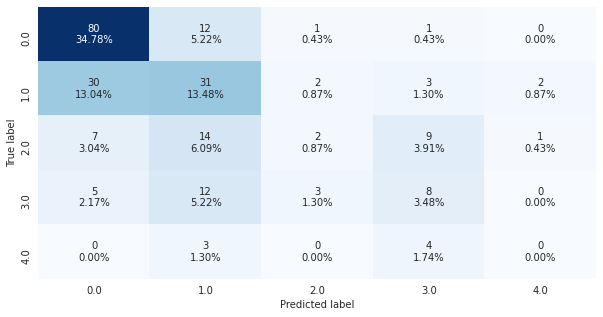

In [81]:
# Get & plot the confusion matrix for logistic regression
y_pred = result.predict(X_test)
plt.figure(figsize = (10, 5))
cm = confusion_matrix(y_test, y_pred)
cm = np.int0(cm)
cls_labels = list(np.unique(y_test))
cmdf = pd.DataFrame(cm, index=cls_labels, columns=cls_labels)
cmdf = cmdf.round()
all_values = cm.ravel()
group_percentages = ["{0:.2%}".format(value/np.sum(all_values)) for value in all_values]
labels = [f"{v2}\n{v3}" for v2, v3 in zip(all_values,group_percentages)]
labels = np.array(labels).reshape(5, 5) 
sns.heatmap(cmdf, annot=labels, fmt='' ,cbar=False, cmap = 'Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [77]:
# Number of trees in random forest
n_estimators = [20, 40, 60, 80, 100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, cv=3, verbose=2, random_state=42, n_jobs=-1)# Fit the random search model
result_rf = rf_random.fit(X_train, y_train)

print('Best Score: %s' % result_rf.best_score_)
print('Best Hyperparameters: %s' % result_rf.best_params_)
print('Test Score: %s' % result_rf.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score: 0.6144927536231884
Best Hyperparameters: {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
Test Score: 0.5260869565217391


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished


In [88]:
df2 = df.replace('?',np.nan)
med_imputer = SimpleImputer(strategy='median')
df2.iloc[:,:] = med_imputer.fit_transform(df2)

X_train, X_test, y_train, y_test = train_test_split(df2.drop('Predict', axis=1), df2['Predict'], random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.5217391304347826
